In [1]:
# Importing dependencies
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
# API login
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

In [3]:
# Importing data
first_date = '2019-01-01'
last_date = '2021-12-31'
raw_data = te.fetchMarkets(symbol=['aapl:us', 'msft:us','hpq:us','sne:us','ibm:us','csco:us'], initDate=first_date, endDate= last_date, output_type='df')[['symbol','close']]


In [4]:
# Data Manipulation
raw_apple_data = raw_data.loc[raw_data['symbol'] == 'AAPL:US']
raw_apple_data.index.name = 'Date'
raw_microsoft_data = raw_data.loc[raw_data['symbol'] == 'MSFT:US']
raw_microsoft_data.index.name = 'Date'
raw_hp_data = raw_data.loc[raw_data['symbol'] == 'HPQ:US']
raw_hp_data.index.name = 'Date'
raw_sony_data = raw_data.loc[raw_data['symbol'] == 'SNE:US']
raw_sony_data.index.name = 'Date'
raw_ibm_data = raw_data.loc[raw_data['symbol'] == 'IBM:US']
raw_ibm_data.index.name = 'Date'
raw_cisco_data = raw_data.loc[raw_data['symbol'] == 'CSCO:US']
raw_cisco_data.index.name = 'Date'

apple = raw_apple_data[['close']].rename(columns={'close': 'Apple'})
microsoft = raw_microsoft_data[['close']].rename(columns={'close': 'Microsoft'})
hp = raw_hp_data[['close']].rename(columns={'close': 'HP'})
sony = raw_sony_data[['close']].rename(columns={'close': 'Sony'})
ibm = raw_ibm_data[['close']].rename(columns={'close': 'IBM'})
cisco = raw_cisco_data[['close']].rename(columns={'close': 'Cisco'})

df = pd.merge(pd.merge(pd.merge(pd.merge(apple,microsoft, on='Date'),pd.merge(hp,sony, on='Date'), on='Date'),ibm, on = 'Date'),cisco, on = 'Date')
#last_index = len(df.index.values.tolist())-1
#df = df.iloc[[last_index, 0]]
df

,Apple,Microsoft,HP,Sony,IBM,Cisco
Date,,,,,,
2021-10-15,144.8400,304.21,28.28,112.50,144.6100,55.2500
2021-10-14,143.7600,302.75,27.49,111.63,143.3900,55.6500
2021-10-13,140.9100,296.31,26.48,109.50,140.7600,54.6200
2021-10-12,141.5100,292.88,26.55,108.95,140.4700,54.2800
2021-10-11,142.8100,294.23,27.68,109.15,142.4300,54.9300
...,...,...,...,...,...,...
2019-01-23,38.4800,106.71,21.44,48.46,132.8900,45.4600
2019-01-22,38.3250,105.68,21.32,48.47,122.5200,44.7800
2019-01-17,38.9175,105.10,21.49,49.55,120.9734,44.1101


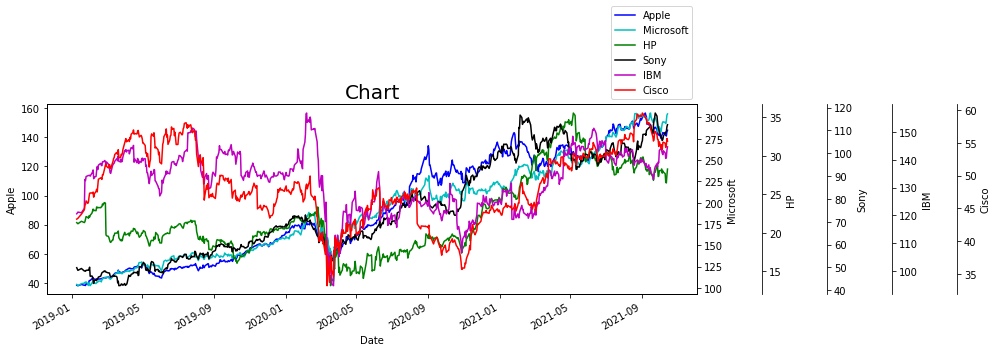

In [5]:
from helper import plot_multi
#plt.style.use('seaborn-paper')
ax = plot_multi(df, figsize=(15, 5))
ax.set_title('Chart', color='black', size=20)
plt.tight_layout()